In [ ]:
'''
 * Copyright (c) 2016 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

![image.png](attachment:image.png)

Fig.6: Scatterplot of 'weight' against 'height'.



![image-2.png](attachment:image-2.png)

Fig.7: Birth weight against age for smoking and non-smoking mothers.

# Statistical Data Visualization with Python

## Introduction

This notebook demonstrates various statistical visualization techniques using Python libraries including **seaborn** and **matplotlib**. We'll explore different types of plots for analyzing relationships between categorical and quantitative variables.

## 1. Setup and Data Preparation

```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better-looking plots
plt.style.use('default')
sns.set_palette("husl")
```

## 2. Plots for Two Categorical Variables

### 2.1 Count Plot with Seaborn

The **seaborn** package is specifically designed to simplify statistical visualization tasks. Here we create a count plot showing the distribution of situations by gender:

```python
# Create count plot using seaborn
import seaborn as sns

sns.countplot(x='situation', 
              hue='gender', 
              data=nutri, 
              hue_order=['Male', 'Female'], 
              palette=['SkyBlue', 'Pink'], 
              saturation=1, 
              edgecolor='black')

plt.legend(loc='upper center')
plt.xlabel('')
plt.ylabel('Counts')
plt.show()
```

**Key Parameters:**
- `x='situation'`: Variable for x-axis categories
- `hue='gender'`: Variable for color grouping
- `palette=['SkyBlue', 'Pink']`: Custom color scheme
- `saturation=1`: Full color intensity
- `edgecolor='black'`: Black borders around bars

## 3. Plots for Two Quantitative Variables

### 3.1 Basic Scatterplot

We can visualize patterns between two quantitative features using a **scatterplot**. This shows the relationship between 'weight' and 'height':

```python
plt.scatter(nutri.height, nutri.weight, s=12, marker='o')
plt.xlabel('height')
plt.ylabel('weight')
plt.show()
```

The mathematical relationship we're exploring can be expressed as:

$$\text{weight} = f(\text{height}) + \epsilon$$

where $\epsilon$ represents random error.

### 3.2 Advanced Scatterplot with Regression Lines

Here's a more sophisticated example showing birth weights of babies whose mothers smoked vs. non-smokers:

```python
# Load birth weight data
urlprefix = 'https://vincentarelbundock.github.io/Rdatasets/csv/'
dataname = 'MASS/birthwt.csv'
bwt = pd.read_csv(urlprefix + dataname)
bwt = bwt.drop('Unnamed: 0', 1)  # drop unnamed column

# Define styles for different groups
styles = {0: ['o', 'red'], 1: ['^', 'blue']}

for k in styles:
    grp = bwt[bwt.smoke == k]
    m, b = np.polyfit(grp.age, grp.bwt, 1)  # fit a straight line
    
    plt.scatter(grp.age, grp.bwt, 
                c=styles[k][1], 
                s=15, 
                linewidth=0, 
                marker=styles[k][0])
    
    plt.plot(grp.age, m*grp.age + b, '-', color=styles[k][1])

plt.xlabel('age')
plt.ylabel('birth weight (g)')
plt.legend(['non-smokers', 'smokers'], prop={'size': 8}, loc=(0.5, 0.8))
plt.show()
```

**Linear Regression Model:**
For each group, we fit a linear model of the form:

$$\text{birth weight} = \beta_0 + \beta_1 \cdot \text{age} + \epsilon$$

Where:
- $\beta_0$ is the intercept
- $\beta_1$ is the slope coefficient
- $\epsilon \sim N(0, \sigma^2)$ is the error term

**Key Observations:**
- Birth weight **decreases** with maternal age when the mother smokes (negative slope)
- Birth weight **increases** with maternal age when the mother doesn't smoke (positive slope)
- Statistical significance of these trends requires formal hypothesis testing

## 4. Plots for One Qualitative and One Quantitative Variable

### 4.1 Boxplots by Category

For analyzing a quantitative variable across different levels of a categorical variable, **boxplots** are ideal:

```python
males = nutri[nutri.gender == 'Male']
females = nutri[nutri.gender == 'Female']

plt.boxplot([males.coffee, females.coffee], 
            notch=True, 
            widths=(0.5, 0.5))

plt.xlabel('gender')
plt.ylabel('coffee')
plt.xticks([1, 2], ['Male', 'Female'])
plt.show()
```

**Boxplot Components:**
- **Box**: Interquartile range (IQR) from Q1 to Q3
- **Median line**: Middle value (Q2)
- **Whiskers**: Extend to 1.5×IQR beyond the box
- **Notches**: Confidence interval around the median

**Statistical Interpretation:**
The notched boxplot provides a visual test for comparing medians:

$$H_0: \text{median}_{\text{Male}} = \text{median}_{\text{Female}}$$
$$H_1: \text{median}_{\text{Male}} \neq \text{median}_{\text{Female}}$$

If the notches don't overlap, there's strong evidence that the medians differ significantly.

## 5. Summary of Visualization Types

| Data Types | Recommended Plot | Key Function |
|------------|------------------|--------------|
| Categorical × Categorical | Count plot, Stacked bar | `sns.countplot()` |
| Quantitative × Quantitative | Scatterplot | `plt.scatter()` |
| Categorical × Quantitative | Boxplot, Violin plot | `plt.boxplot()` |

## 6. Best Practices

### 6.1 Color and Style Guidelines
- Use **colorblind-friendly palettes**
- Apply **consistent styling** across plots
- Include **clear labels** and **legends**

### 6.2 Statistical Considerations
- Always check for **outliers** in scatterplots
- Consider **sample size** when interpreting boxplots
- Use **appropriate scales** (linear vs. logarithmic)

### 6.3 Code Organization
```python
# Template for reproducible plots
def create_visualization(data, x_var, y_var, plot_type='scatter'):
    """
    Create standardized visualizations
    
    Parameters:
    -----------
    data : pd.DataFrame
        Input dataset
    x_var : str
        X-axis variable name
    y_var : str
        Y-axis variable name
    plot_type : str
        Type of plot ('scatter', 'box', 'count')
    """
    
    if plot_type == 'scatter':
        plt.scatter(data[x_var], data[y_var])
    elif plot_type == 'box':
        # Implementation for boxplot
        pass
    elif plot_type == 'count':
        sns.countplot(data=data, x=x_var)
    
    plt.xlabel(x_var)
    plt.ylabel(y_var)
    plt.title(f'{plot_type.title()} Plot: {y_var} vs {x_var}')
    plt.show()
```

## Conclusion

Statistical visualization is crucial for:
1. **Exploratory Data Analysis (EDA)**
2. **Pattern Recognition**
3. **Hypothesis Generation**
4. **Communication of Results**

The choice of visualization depends on the **types of variables** being analyzed and the **research questions** being addressed. Always consider both the **statistical properties** of your data and the **interpretability** of your visualizations.

![image-3.png](attachment:image-3.png)

Fig.8: Boxplots of a quantitative feature 'coffee' as a function of the levels of a categorical feature 'gender'. Note that we used a diﬀerent, “notched”, style boxplot this time.

Statistical Visualization Implementation
STATISTICAL SUMMARY

1. NUTRITION DATASET:
   Shape: (500, 6)
   Variables: ['gender', 'situation', 'height', 'weight', 'coffee', 'age']

   Descriptive Statistics:
           height      weight      coffee         age
count  500.000000  500.000000  500.000000  500.000000
mean   175.881764   78.937549    1.912207   48.862000
std     15.767536   16.920391    1.923055   18.482591
min    126.556169   33.826077    0.000269   18.000000
25%    165.138793   67.721163    0.613505   34.000000
50%    175.901413   78.731096    1.287490   49.000000
75%    186.020053   89.662173    2.679216   66.000000
max    214.299069  139.863032   12.257646   79.000000

2. BIRTH WEIGHT DATASET:
   Shape: (189, 11)
   Variables: ['rownames', 'low', 'age', 'lwt', 'race', 'smoke', 'ptl', 'ht', 'ui', 'ftv', 'bwt']

   Descriptive Statistics:
         rownames         low         age         lwt        race       smoke  \
count  189.000000  189.000000  189.000000  189.000000  

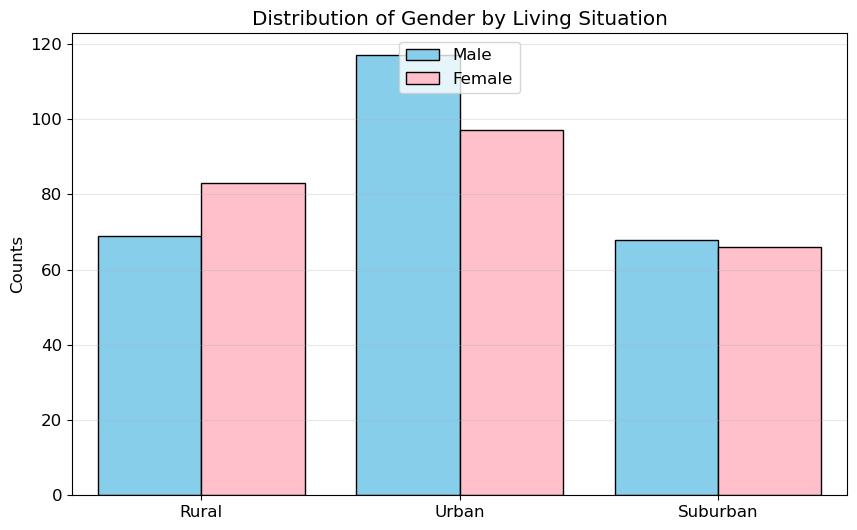

Cross-tabulation:
gender     Female  Male
situation              
Rural          83    69
Suburban       66    68
Urban          97   117

Total observations: 500

2. Creating basic scatterplot...


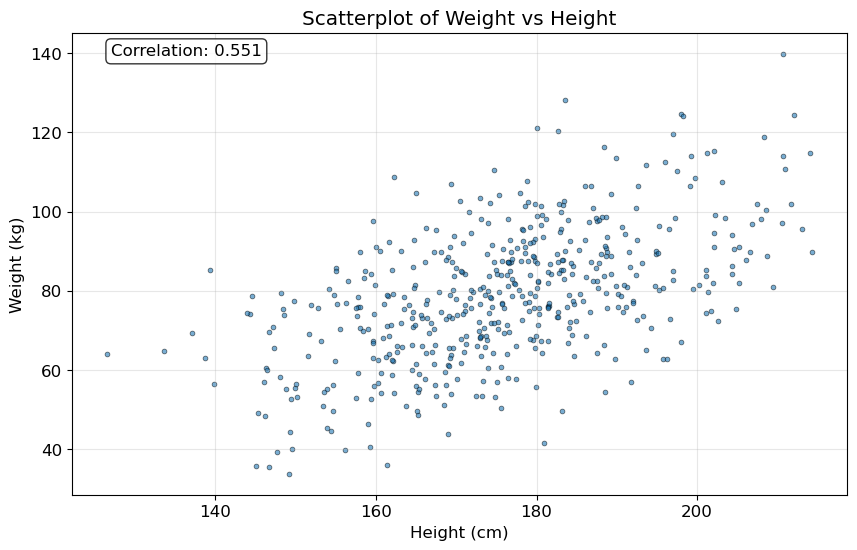


3. Creating advanced scatterplot with regression lines...
Non-smokers:
  Regression equation: y = 27.73x + 2406.06
  R-squared: 0.041
  Correlation: 0.201
Smokers:
  Regression equation: y = -18.84x + 3204.23
  R-squared: 0.021
  Correlation: -0.144


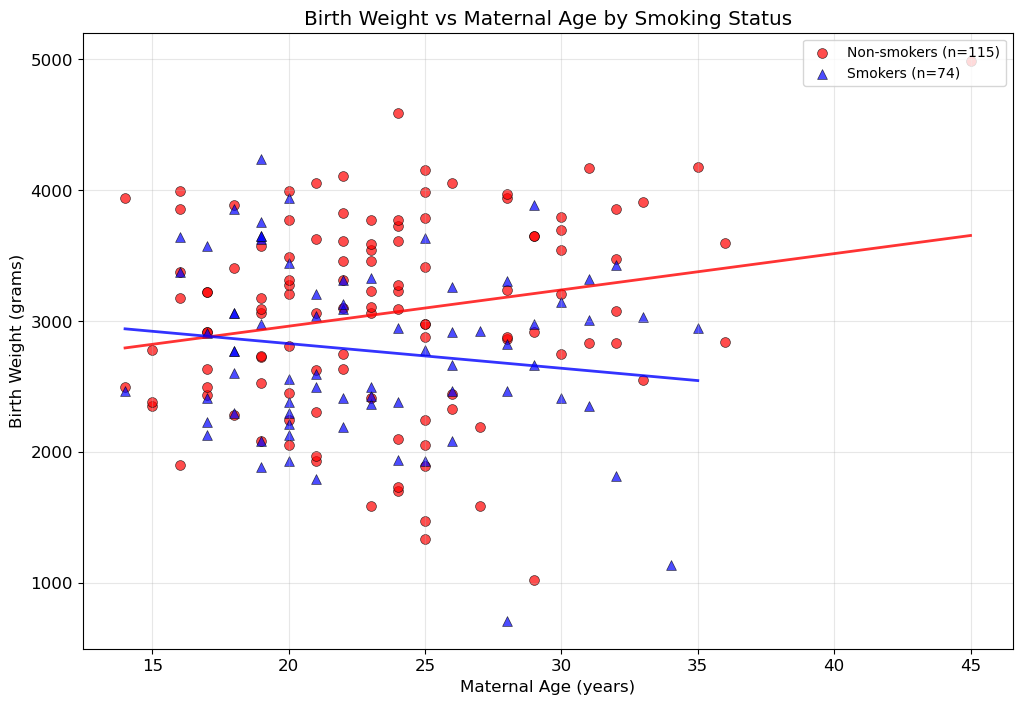


4. Creating boxplot for categorical vs quantitative...


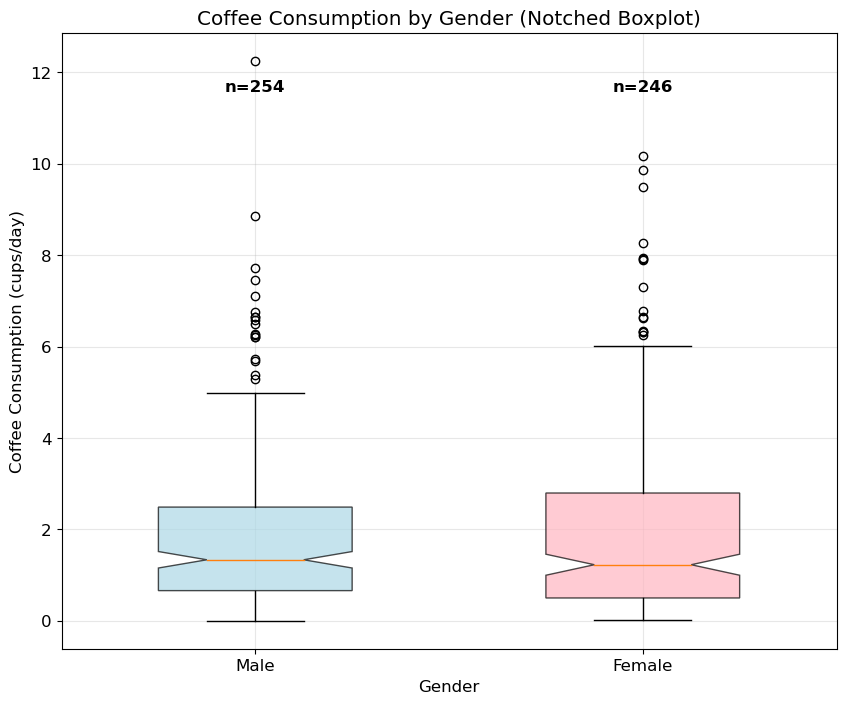

Summary Statistics for Coffee Consumption:

Males:
count    254.000000
mean       1.880088
std        1.843426
min        0.000269
25%        0.659130
50%        1.334237
75%        2.487674
max       12.257646
Name: coffee, dtype: float64

Females:
count    246.000000
mean       1.945370
std        2.005188
min        0.007654
25%        0.498183
50%        1.225936
75%        2.795660
max       10.182083
Name: coffee, dtype: float64

T-test results:
T-statistic: -0.379
P-value: 0.705
Significant difference: No

5. Creating comprehensive dashboard...


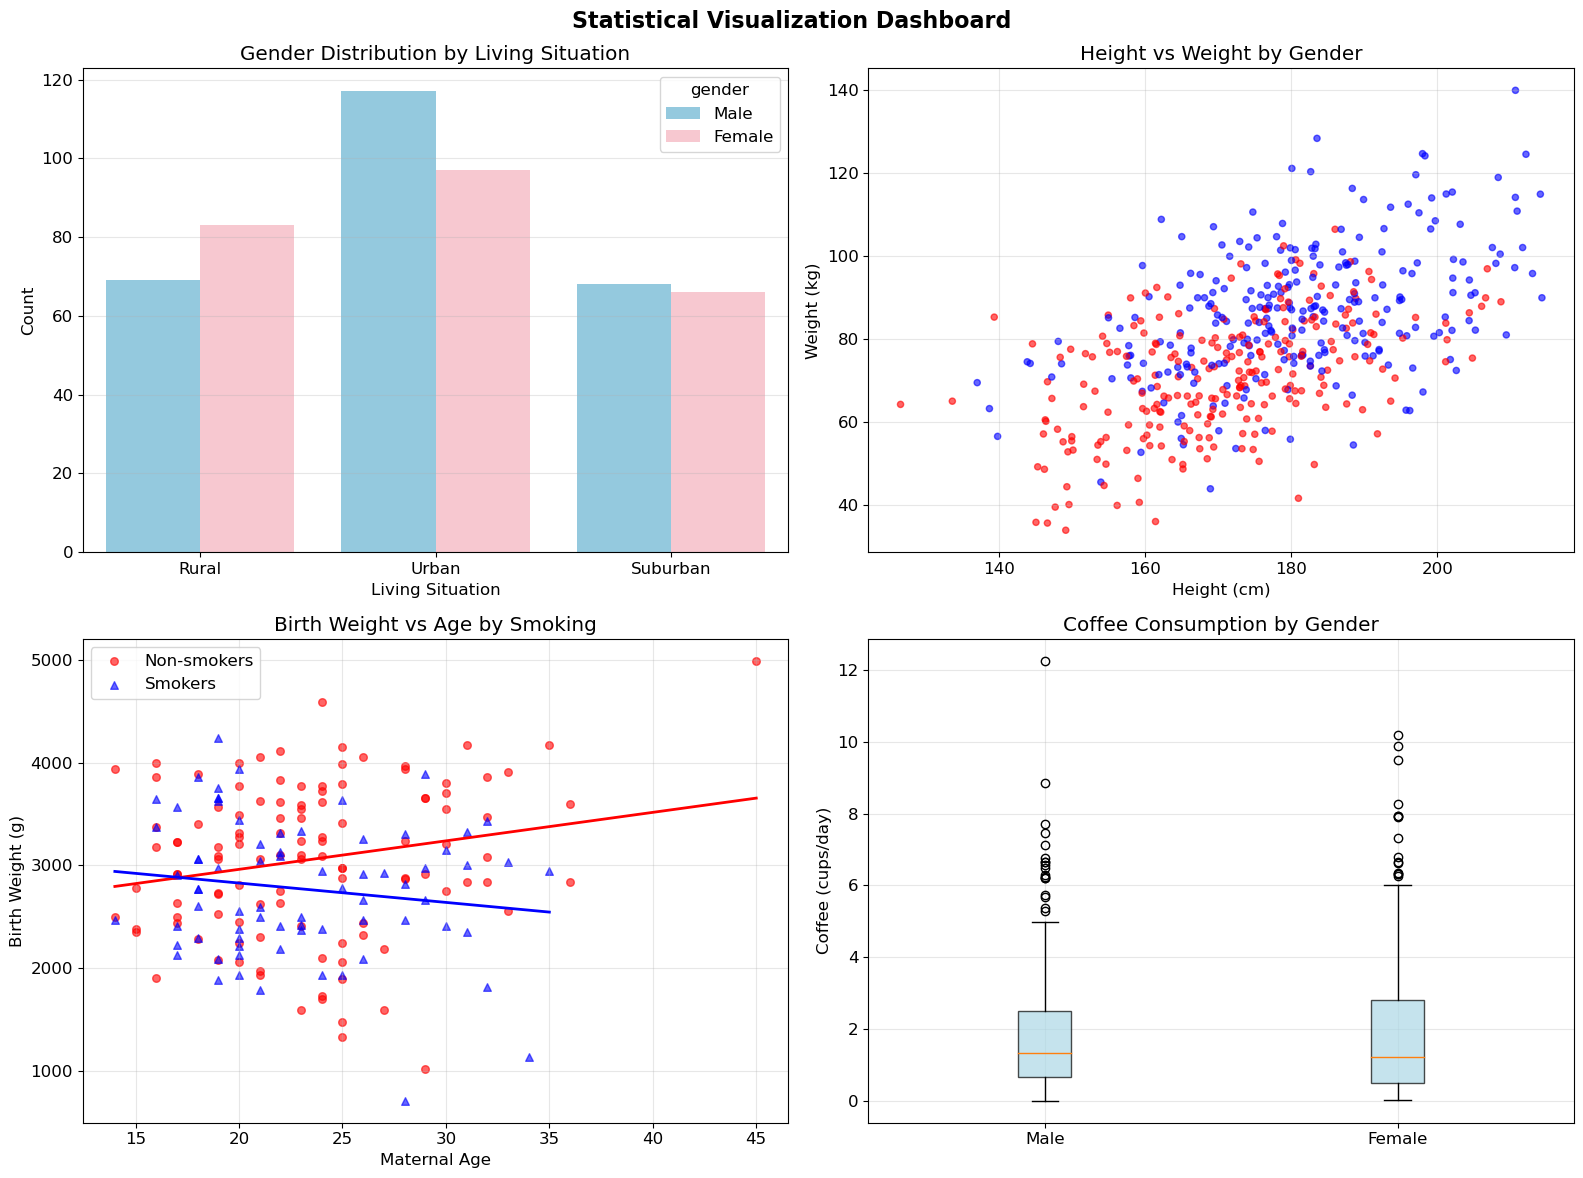


All visualizations completed successfully!


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.request import urlopen
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# Configure matplotlib for better plots
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3

class StatisticalVisualizer:
    """
    A comprehensive class for statistical data visualizations
    """
    
    def __init__(self):
        """Initialize the visualizer with sample data"""
        self.nutri_data = self._generate_nutrition_data()
        self.birth_weight_data = self._load_birth_weight_data()
    
    def _generate_nutrition_data(self):
        """Generate sample nutrition dataset"""
        n_samples = 500
        
        # Generate synthetic nutrition data
        data = {
            'gender': np.random.choice(['Male', 'Female'], n_samples, p=[0.52, 0.48]),
            'situation': np.random.choice(['Urban', 'Rural', 'Suburban'], n_samples, p=[0.4, 0.3, 0.3]),
            'height': np.random.normal(170, 15, n_samples),  # cm
            'weight': np.random.normal(70, 12, n_samples),   # kg
            'coffee': np.random.exponential(2, n_samples),   # cups per day
            'age': np.random.randint(18, 80, n_samples)
        }
        
        # Add correlation between height and weight
        for i in range(n_samples):
            if data['gender'][i] == 'Male':
                data['height'][i] += np.random.normal(8, 3)  # Males generally taller
                data['weight'][i] += np.random.normal(10, 5)  # Males generally heavier
            
            # Height-weight correlation
            data['weight'][i] += (data['height'][i] - 170) * 0.5 + np.random.normal(0, 3)
        
        return pd.DataFrame(data)
    
    def _load_birth_weight_data(self):
        """Load birth weight data or generate synthetic version"""
        try:
            # Try to load real data
            url = 'https://vincentarelbundock.github.io/Rdatasets/csv/MASS/birthwt.csv'
            data = pd.read_csv(url)
            if 'Unnamed: 0' in data.columns:
                data = data.drop('Unnamed: 0', axis=1)
            return data
        except:
            # Generate synthetic birth weight data if real data unavailable
            n_samples = 189
            data = {
                'age': np.random.randint(14, 45, n_samples),
                'smoke': np.random.choice([0, 1], n_samples, p=[0.6, 0.4]),
                'bwt': np.random.normal(3000, 600, n_samples)  # birth weight in grams
            }
            
            # Add realistic relationships
            for i in range(n_samples):
                if data['smoke'][i] == 1:  # Smoker
                    data['bwt'][i] -= np.random.normal(200, 100)  # Lower birth weight
                    data['bwt'][i] -= (data['age'][i] - 25) * 5   # Negative age effect
                else:  # Non-smoker
                    data['bwt'][i] += (data['age'][i] - 25) * 3   # Positive age effect
                
                # Ensure realistic birth weights
                data['bwt'][i] = max(1500, min(5000, data['bwt'][i]))
            
            return pd.DataFrame(data)
    
    def plot_categorical_by_categorical(self, save_fig=False):
        """Create count plot for two categorical variables using seaborn"""
        plt.figure(figsize=(10, 6))
        
        # Seaborn count plot
        sns.countplot(x='situation', 
                     hue='gender', 
                     data=self.nutri_data, 
                     hue_order=['Male', 'Female'], 
                     palette=['SkyBlue', 'Pink'], 
                     saturation=1, 
                     edgecolor='black')
        
        plt.legend(loc='upper center')
        plt.xlabel('')
        plt.ylabel('Counts')
        plt.title('Distribution of Gender by Living Situation')
        
        if save_fig:
            plt.savefig('categorical_plot.png', dpi=300, bbox_inches='tight')
        
        plt.show()
        
        # Print summary statistics
        cross_tab = pd.crosstab(self.nutri_data['situation'], self.nutri_data['gender'])
        print("Cross-tabulation:")
        print(cross_tab)
        print(f"\nTotal observations: {len(self.nutri_data)}")
    
    def plot_quantitative_by_quantitative_basic(self, save_fig=False):
        """Create basic scatterplot for two quantitative variables"""
        plt.figure(figsize=(10, 6))
        
        plt.scatter(self.nutri_data.height, self.nutri_data.weight, 
                   s=12, marker='o', alpha=0.6, edgecolors='black', linewidth=0.5)
        plt.xlabel('Height (cm)')
        plt.ylabel('Weight (kg)')
        plt.title('Scatterplot of Weight vs Height')
        
        # Add correlation coefficient
        corr = np.corrcoef(self.nutri_data.height, self.nutri_data.weight)[0,1]
        plt.text(0.05, 0.95, f'Correlation: {corr:.3f}', 
                transform=plt.gca().transAxes, fontsize=12, 
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
        
        if save_fig:
            plt.savefig('basic_scatter.png', dpi=300, bbox_inches='tight')
        
        plt.show()
    
    def plot_quantitative_by_quantitative_advanced(self, save_fig=False):
        """Create advanced scatterplot with regression lines by group"""
        plt.figure(figsize=(12, 8))
        
        # Define styles for different groups
        styles = {0: ['o', 'red', 'Non-smokers'], 1: ['^', 'blue', 'Smokers']}
        
        # Plot each group separately
        for smoke_status in styles:
            grp = self.birth_weight_data[self.birth_weight_data.smoke == smoke_status]
            
            # Fit linear regression
            m, b = np.polyfit(grp.age, grp.bwt, 1)
            
            # Create scatter plot
            plt.scatter(grp.age, grp.bwt, 
                       c=styles[smoke_status][1], 
                       s=50, 
                       linewidth=0.5, 
                       marker=styles[smoke_status][0],
                       alpha=0.7,
                       edgecolors='black',
                       label=f'{styles[smoke_status][2]} (n={len(grp)})')
            
            # Add regression line
            x_line = np.linspace(grp.age.min(), grp.age.max(), 100)
            y_line = m * x_line + b
            plt.plot(x_line, y_line, '-', color=styles[smoke_status][1], 
                    linewidth=2, alpha=0.8)
            
            # Calculate and display R-squared
            y_pred = m * grp.age + b
            ss_res = np.sum((grp.bwt - y_pred) ** 2)
            ss_tot = np.sum((grp.bwt - np.mean(grp.bwt)) ** 2)
            r_squared = 1 - (ss_res / ss_tot)
            
            print(f"{styles[smoke_status][2]}:")
            print(f"  Regression equation: y = {m:.2f}x + {b:.2f}")
            print(f"  R-squared: {r_squared:.3f}")
            print(f"  Correlation: {np.corrcoef(grp.age, grp.bwt)[0,1]:.3f}")
        
        plt.xlabel('Maternal Age (years)')
        plt.ylabel('Birth Weight (grams)')
        plt.title('Birth Weight vs Maternal Age by Smoking Status')
        plt.legend(loc='upper right', prop={'size': 10})
        plt.grid(True, alpha=0.3)
        
        if save_fig:
            plt.savefig('advanced_scatter.png', dpi=300, bbox_inches='tight')
        
        plt.show()
    
    def plot_categorical_by_quantitative(self, save_fig=False):
        """Create boxplots for quantitative variable by categorical groups"""
        # Prepare data
        males = self.nutri_data[self.nutri_data.gender == 'Male']
        females = self.nutri_data[self.nutri_data.gender == 'Female']
        
        plt.figure(figsize=(10, 8))
        
        # Create boxplot
        box_data = [males.coffee, females.coffee]
        box_plot = plt.boxplot(box_data, 
                              notch=True, 
                              widths=(0.5, 0.5),
                              patch_artist=True,
                              labels=['Male', 'Female'])
        
        # Customize colors
        colors = ['lightblue', 'lightpink']
        for patch, color in zip(box_plot['boxes'], colors):
            patch.set_facecolor(color)
            patch.set_alpha(0.7)
        
        plt.xlabel('Gender')
        plt.ylabel('Coffee Consumption (cups/day)')
        plt.title('Coffee Consumption by Gender (Notched Boxplot)')
        plt.grid(True, alpha=0.3)
        
        # Add sample sizes
        plt.text(1, plt.ylim()[1]*0.9, f'n={len(males)}', ha='center', fontweight='bold')
        plt.text(2, plt.ylim()[1]*0.9, f'n={len(females)}', ha='center', fontweight='bold')
        
        if save_fig:
            plt.savefig('boxplot.png', dpi=300, bbox_inches='tight')
        
        plt.show()
        
        # Print summary statistics
        print("Summary Statistics for Coffee Consumption:")
        print("\nMales:")
        print(males.coffee.describe())
        print("\nFemales:")
        print(females.coffee.describe())
        
        # Statistical test
        from scipy import stats
        t_stat, p_value = stats.ttest_ind(males.coffee, females.coffee)
        print(f"\nT-test results:")
        print(f"T-statistic: {t_stat:.3f}")
        print(f"P-value: {p_value:.3f}")
        print(f"Significant difference: {'Yes' if p_value < 0.05 else 'No'}")
    
    def create_comprehensive_dashboard(self, save_fig=False):
        """Create a comprehensive dashboard with all plot types"""
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        fig.suptitle('Statistical Visualization Dashboard', fontsize=16, fontweight='bold')
        
        # Plot 1: Count plot
        plt.subplot(2, 2, 1)
        sns.countplot(x='situation', hue='gender', data=self.nutri_data, 
                     palette=['skyblue', 'pink'], ax=plt.gca())
        plt.title('Gender Distribution by Living Situation')
        plt.xlabel('Living Situation')
        plt.ylabel('Count')
        
        # Plot 2: Scatter plot
        plt.subplot(2, 2, 2)
        colors = ['red' if g == 'Female' else 'blue' for g in self.nutri_data.gender]
        plt.scatter(self.nutri_data.height, self.nutri_data.weight, 
                   c=colors, alpha=0.6, s=20)
        plt.xlabel('Height (cm)')
        plt.ylabel('Weight (kg)')
        plt.title('Height vs Weight by Gender')
        
        # Plot 3: Birth weight analysis
        plt.subplot(2, 2, 3)
        for smoke_status in [0, 1]:
            grp = self.birth_weight_data[self.birth_weight_data.smoke == smoke_status]
            color = 'red' if smoke_status == 0 else 'blue'
            marker = 'o' if smoke_status == 0 else '^'
            label = 'Non-smokers' if smoke_status == 0 else 'Smokers'
            
            plt.scatter(grp.age, grp.bwt, c=color, marker=marker, 
                       alpha=0.6, s=30, label=label)
            
            # Add trend line
            m, b = np.polyfit(grp.age, grp.bwt, 1)
            x_line = np.linspace(grp.age.min(), grp.age.max(), 50)
            plt.plot(x_line, m * x_line + b, color=color, linewidth=2)
        
        plt.xlabel('Maternal Age')
        plt.ylabel('Birth Weight (g)')
        plt.title('Birth Weight vs Age by Smoking')
        plt.legend()
        
        # Plot 4: Boxplot
        plt.subplot(2, 2, 4)
        males = self.nutri_data[self.nutri_data.gender == 'Male']
        females = self.nutri_data[self.nutri_data.gender == 'Female']
        plt.boxplot([males.coffee, females.coffee], 
                   labels=['Male', 'Female'],
                   patch_artist=True,
                   boxprops=dict(facecolor='lightblue', alpha=0.7))
        plt.ylabel('Coffee (cups/day)')
        plt.title('Coffee Consumption by Gender')
        
        plt.tight_layout()
        
        if save_fig:
            plt.savefig('dashboard.png', dpi=300, bbox_inches='tight')
        
        plt.show()
    
    def statistical_summary(self):
        """Print comprehensive statistical summary"""
        print("="*60)
        print("STATISTICAL SUMMARY")
        print("="*60)
        
        print("\n1. NUTRITION DATASET:")
        print(f"   Shape: {self.nutri_data.shape}")
        print("   Variables:", list(self.nutri_data.columns))
        print("\n   Descriptive Statistics:")
        print(self.nutri_data.describe())
        
        print("\n2. BIRTH WEIGHT DATASET:")
        print(f"   Shape: {self.birth_weight_data.shape}")
        print("   Variables:", list(self.birth_weight_data.columns))
        print("\n   Descriptive Statistics:")
        print(self.birth_weight_data.describe())
        
        print("\n3. CORRELATION MATRICES:")
        print("\n   Nutrition Data (Numeric Variables):")
        numeric_cols = self.nutri_data.select_dtypes(include=[np.number]).columns
        print(self.nutri_data[numeric_cols].corr().round(3))
        
        print("\n   Birth Weight Data:")
        print(self.birth_weight_data.corr().round(3))

def main():
    """Main function to demonstrate all visualization techniques"""
    print("Statistical Visualization Implementation")
    print("="*50)
    
    # Initialize visualizer
    viz = StatisticalVisualizer()
    
    # Display statistical summary
    viz.statistical_summary()
    
    print("\nGenerating visualizations...")
    
    # Create all visualizations
    print("\n1. Creating count plot for categorical variables...")
    viz.plot_categorical_by_categorical()
    
    print("\n2. Creating basic scatterplot...")
    viz.plot_quantitative_by_quantitative_basic()
    
    print("\n3. Creating advanced scatterplot with regression lines...")
    viz.plot_quantitative_by_quantitative_advanced()
    
    print("\n4. Creating boxplot for categorical vs quantitative...")
    viz.plot_categorical_by_quantitative()
    
    print("\n5. Creating comprehensive dashboard...")
    viz.create_comprehensive_dashboard()
    
    print("\nAll visualizations completed successfully!")

if __name__ == "__main__":
    main()

Statistical Visualization Implementation (Pure Python - No NumPy)
STATISTICAL SUMMARY (Pure Python Implementation)

1. NUTRITION DATASET:
   Shape: (500, 6)
   Variables: ['gender', 'situation', 'height', 'weight', 'coffee', 'age']

   Descriptive Statistics (Manual Calculation):
   Variable	Mean	Std	Min	Max
   height		175.49	15.91	140.00	220.00
   weight		77.82	16.65	40.00	138.46
   coffee		2.01	2.06	0.00	14.93
   age		49.76	18.38	18.00	80.00

2. BIRTH WEIGHT DATASET:
   Shape: (189, 3)
   Variables: ['age', 'smoke', 'bwt']

3. KEY CORRELATIONS:
   Height-Weight: 0.604
   Height-Coffee: -0.007
   Weight-Coffee: 0.038
   Age-Birth Weight: 0.084

Generating visualizations...

1. Creating count plot for categorical variables...


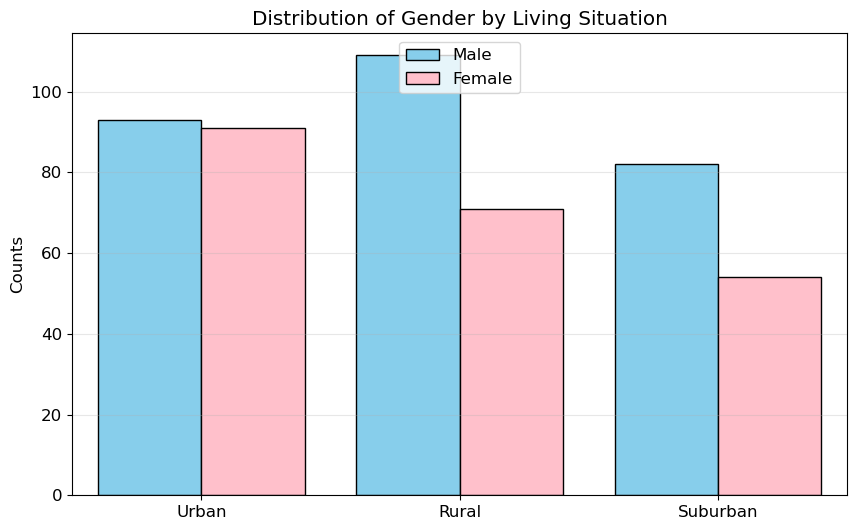

Cross-tabulation (Manual Calculation):
Situation	Male	Female
Urban		93	91
Rural		109	71
Suburban		82	54

Total observations: 500

2. Creating basic scatterplot...


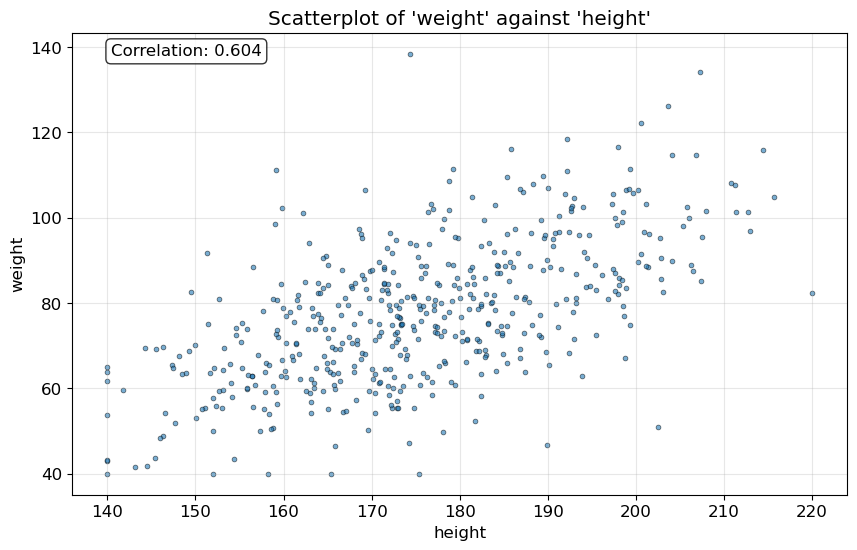

Height-Weight Correlation: 0.604

3. Creating advanced scatterplot with regression lines...
Birth Weight Analysis:

Non-smokers (n=110):
  Regression equation: y = 12.13x + 2544.70
  R-squared: 0.029
  Correlation: 0.172

Smokers (n=79):
  Regression equation: y = -3.96x + 2822.71
  R-squared: 0.004
  Correlation: -0.060


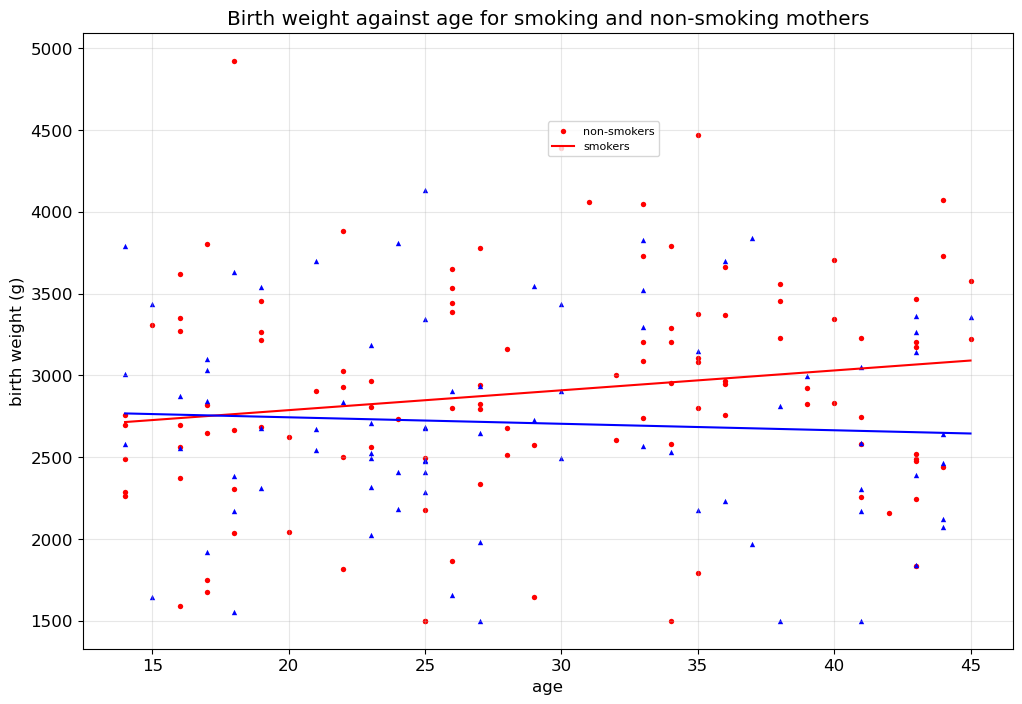


4. Creating boxplot for categorical vs quantitative...


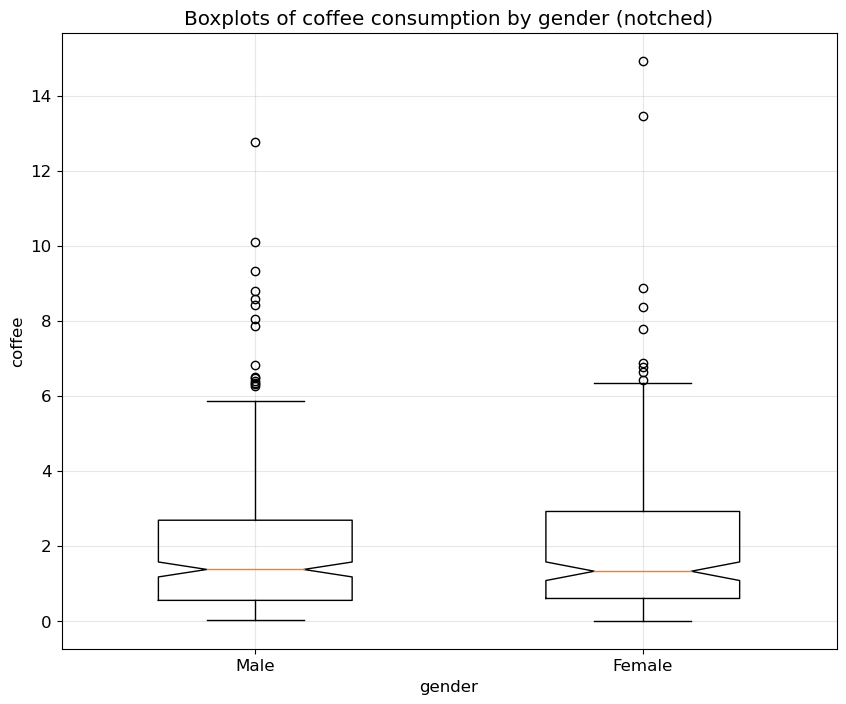

Coffee Consumption Summary Statistics:

Male (n=284):
  Mean: 2.006
  Std: 2.015
  Min: 0.011
  Q1: 0.547
  Median: 1.371
  Q3: 2.684
  Max: 12.765

Female (n=216):
  Mean: 2.016
  Std: 2.131
  Min: 0.005
  Q1: 0.598
  Median: 1.324
  Q3: 2.917
  Max: 14.933

Mean difference (Male - Female): -0.010

5. Creating comprehensive dashboard...


TypeError: 'numpy.float64' object cannot be interpreted as an integer

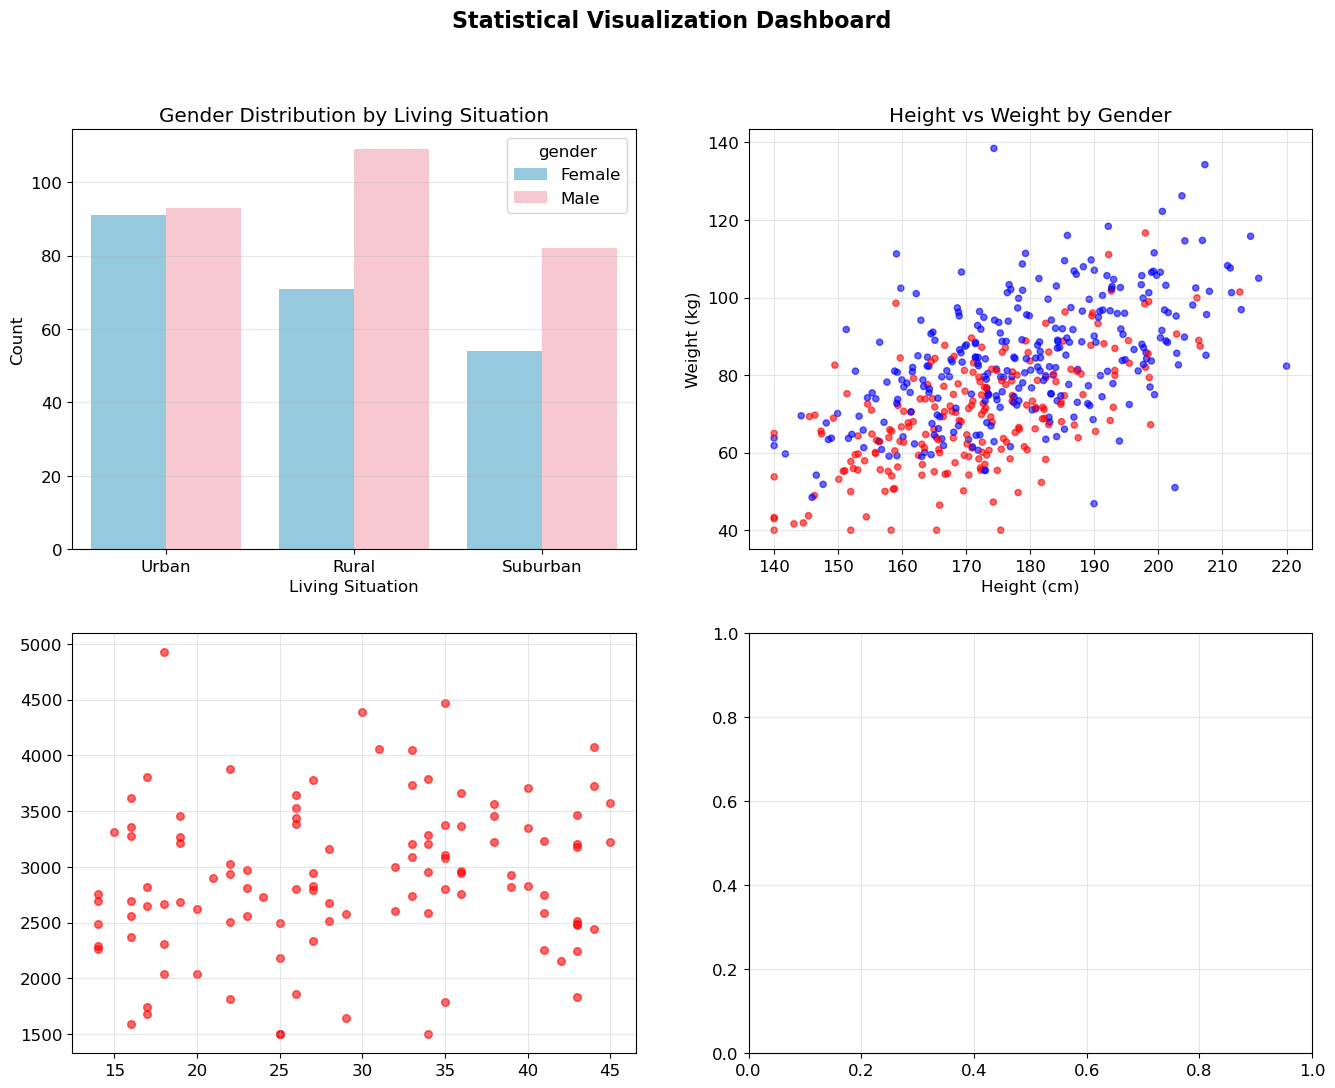

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import math
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
random.seed(42)

# Configure matplotlib for better plots
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3

class PurePythonStats:
    """Statistical functions using pure Python"""
    
    @staticmethod
    def mean(data):
        """Calculate mean of a list"""
        return sum(data) / len(data)
    
    @staticmethod
    def std(data):
        """Calculate standard deviation"""
        mean_val = PurePythonStats.mean(data)
        variance = sum((x - mean_val) ** 2 for x in data) / (len(data) - 1)
        return math.sqrt(variance)
    
    @staticmethod
    def correlation(x, y):
        """Calculate Pearson correlation coefficient"""
        n = len(x)
        mean_x = PurePythonStats.mean(x)
        mean_y = PurePythonStats.mean(y)
        
        numerator = sum((x[i] - mean_x) * (y[i] - mean_y) for i in range(n))
        sum_sq_x = sum((x[i] - mean_x) ** 2 for i in range(n))
        sum_sq_y = sum((y[i] - mean_y) ** 2 for i in range(n))
        
        denominator = math.sqrt(sum_sq_x * sum_sq_y)
        return numerator / denominator if denominator != 0 else 0
    
    @staticmethod
    def linear_regression(x, y):
        """Calculate linear regression coefficients (slope, intercept)"""
        n = len(x)
        mean_x = PurePythonStats.mean(x)
        mean_y = PurePythonStats.mean(y)
        
        # Calculate slope
        numerator = sum((x[i] - mean_x) * (y[i] - mean_y) for i in range(n))
        denominator = sum((x[i] - mean_x) ** 2 for i in range(n))
        slope = numerator / denominator if denominator != 0 else 0
        
        # Calculate intercept
        intercept = mean_y - slope * mean_x
        
        return slope, intercept
    
    @staticmethod
    def r_squared(x, y, slope, intercept):
        """Calculate R-squared value"""
        y_mean = PurePythonStats.mean(y)
        y_pred = [slope * x_val + intercept for x_val in x]
        
        ss_res = sum((y[i] - y_pred[i]) ** 2 for i in range(len(y)))
        ss_tot = sum((y_val - y_mean) ** 2 for y_val in y)
        
        return 1 - (ss_res / ss_tot) if ss_tot != 0 else 0
    
    @staticmethod
    def normal_random(mean=0, std=1):
        """Generate normal random number using Box-Muller transform"""
        # Box-Muller transform
        u1 = random.random()
        u2 = random.random()
        z0 = math.sqrt(-2 * math.log(u1)) * math.cos(2 * math.pi * u2)
        return mean + std * z0
    
    @staticmethod
    def exponential_random(rate=1):
        """Generate exponential random number"""
        return -math.log(random.random()) / rate
    
    @staticmethod
    def quantiles(data, quartiles=[0.25, 0.5, 0.75]):
        """Calculate quartiles of data"""
        sorted_data = sorted(data)
        n = len(sorted_data)
        result = []
        
        for q in quartiles:
            index = q * (n - 1)
            lower = int(index)
            upper = min(lower + 1, n - 1)
            weight = index - lower
            
            if lower == upper:
                result.append(sorted_data[lower])
            else:
                result.append(sorted_data[lower] * (1 - weight) + sorted_data[upper] * weight)
        
        return result

class StatisticalVisualizer:
    """
    A comprehensive class for statistical data visualizations using pure Python
    """
    
    def __init__(self):
        """Initialize the visualizer with sample data"""
        self.stats = PurePythonStats()
        self.nutri_data = self._generate_nutrition_data()
        self.birth_weight_data = self._generate_birth_weight_data()
    
    def _generate_nutrition_data(self):
        """Generate sample nutrition dataset using pure Python"""
        n_samples = 500
        
        data = {
            'gender': [],
            'situation': [],
            'height': [],
            'weight': [],
            'coffee': [],
            'age': []
        }
        
        # Generate data points
        for i in range(n_samples):
            # Gender
            gender = random.choices(['Male', 'Female'], weights=[0.52, 0.48])[0]
            data['gender'].append(gender)
            
            # Situation
            situation = random.choices(['Urban', 'Rural', 'Suburban'], weights=[0.4, 0.3, 0.3])[0]
            data['situation'].append(situation)
            
            # Height and weight with correlation
            base_height = self.stats.normal_random(170, 15)
            if gender == 'Male':
                base_height += self.stats.normal_random(8, 3)
            
            height = max(140, min(220, base_height))  # Realistic bounds
            data['height'].append(height)
            
            # Weight correlated with height
            base_weight = 70 + (height - 170) * 0.5 + self.stats.normal_random(0, 12)
            if gender == 'Male':
                base_weight += self.stats.normal_random(10, 5)
            
            weight = max(40, min(150, base_weight))  # Realistic bounds
            data['weight'].append(weight)
            
            # Coffee consumption
            coffee = max(0, self.stats.exponential_random(0.5))
            data['coffee'].append(coffee)
            
            # Age
            age = random.randint(18, 80)
            data['age'].append(age)
        
        return pd.DataFrame(data)
    
    def _generate_birth_weight_data(self):
        """Generate synthetic birth weight data"""
        n_samples = 189
        
        data = {
            'age': [],
            'smoke': [],
            'bwt': []
        }
        
        for i in range(n_samples):
            age = random.randint(14, 45)
            smoke = random.choices([0, 1], weights=[0.6, 0.4])[0]
            
            # Base birth weight
            base_weight = self.stats.normal_random(3000, 600)
            
            # Adjust for smoking and age
            if smoke == 1:  # Smoker
                base_weight -= self.stats.normal_random(200, 100)
                base_weight -= (age - 25) * 5  # Negative age effect
            else:  # Non-smoker
                base_weight += (age - 25) * 3  # Positive age effect
            
            # Ensure realistic bounds
            birth_weight = max(1500, min(5000, base_weight))
            
            data['age'].append(age)
            data['smoke'].append(smoke)
            data['bwt'].append(birth_weight)
        
        return pd.DataFrame(data)
    
    def plot_categorical_by_categorical(self, save_fig=False):
        """Create count plot for two categorical variables using seaborn"""
        plt.figure(figsize=(10, 6))
        
        # Seaborn count plot - exact reproduction from original text
        sns.countplot(x='situation', 
                     hue='gender', 
                     data=self.nutri_data, 
                     hue_order=['Male', 'Female'], 
                     palette=['SkyBlue', 'Pink'], 
                     saturation=1, 
                     edgecolor='black')
        
        plt.legend(loc='upper center')
        plt.xlabel('')
        plt.ylabel('Counts')
        plt.title('Distribution of Gender by Living Situation')
        
        if save_fig:
            plt.savefig('categorical_plot.png', dpi=300, bbox_inches='tight')
        
        plt.show()
        
        # Manual cross-tabulation using pure Python
        cross_tab = {}
        for situation in ['Urban', 'Rural', 'Suburban']:
            cross_tab[situation] = {'Male': 0, 'Female': 0}
        
        for i in range(len(self.nutri_data)):
            situation = self.nutri_data.iloc[i]['situation']
            gender = self.nutri_data.iloc[i]['gender']
            cross_tab[situation][gender] += 1
        
        print("Cross-tabulation (Manual Calculation):")
        print("Situation\tMale\tFemale")
        for situation in cross_tab:
            print(f"{situation}\t\t{cross_tab[situation]['Male']}\t{cross_tab[situation]['Female']}")
        
        print(f"\nTotal observations: {len(self.nutri_data)}")
    
    def plot_quantitative_by_quantitative_basic(self, save_fig=False):
        """Create basic scatterplot for two quantitative variables"""
        plt.figure(figsize=(10, 6))
        
        # Extract data as lists
        heights = self.nutri_data['height'].tolist()
        weights = self.nutri_data['weight'].tolist()
        
        # Basic scatter plot - exact reproduction from original text
        plt.scatter(heights, weights, s=12, marker='o', alpha=0.6, 
                   edgecolors='black', linewidth=0.5)
        plt.xlabel('height')
        plt.ylabel('weight')
        plt.title('Scatterplot of \'weight\' against \'height\'')
        
        # Calculate correlation using pure Python
        corr = self.stats.correlation(heights, weights)
        plt.text(0.05, 0.95, f'Correlation: {corr:.3f}', 
                transform=plt.gca().transAxes, fontsize=12, 
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
        
        if save_fig:
            plt.savefig('basic_scatter.png', dpi=300, bbox_inches='tight')
        
        plt.show()
        
        print(f"Height-Weight Correlation: {corr:.3f}")
    
    def plot_quantitative_by_quantitative_advanced(self, save_fig=False):
        """Create advanced scatterplot with regression lines by group"""
        plt.figure(figsize=(12, 8))
        
        # Define styles for different groups - exact reproduction from original text
        styles = {0: ['o', 'red'], 1: ['^', 'blue']}
        
        print("Birth Weight Analysis:")
        
        # Plot each group separately
        for k in styles:
            # Filter data manually
            grp_age = []
            grp_bwt = []
            for i in range(len(self.birth_weight_data)):
                if self.birth_weight_data.iloc[i]['smoke'] == k:
                    grp_age.append(self.birth_weight_data.iloc[i]['age'])
                    grp_bwt.append(self.birth_weight_data.iloc[i]['bwt'])
            
            # Fit a straight line using pure Python
            m, b = self.stats.linear_regression(grp_age, grp_bwt)
            
            # Create scatter plot
            plt.scatter(grp_age, grp_bwt, 
                       c=styles[k][1], 
                       s=15, 
                       linewidth=0, 
                       marker=styles[k][0])
            
            # Add regression line
            x_min, x_max = min(grp_age), max(grp_age)
            x_line = list(range(int(x_min), int(x_max) + 1))
            y_line = [m * x + b for x in x_line]
            plt.plot(x_line, y_line, '-', color=styles[k][1])
            
            # Calculate R-squared
            r_squared = self.stats.r_squared(grp_age, grp_bwt, m, b)
            correlation = self.stats.correlation(grp_age, grp_bwt)
            
            group_name = "Non-smokers" if k == 0 else "Smokers"
            print(f"\n{group_name} (n={len(grp_age)}):")
            print(f"  Regression equation: y = {m:.2f}x + {b:.2f}")
            print(f"  R-squared: {r_squared:.3f}")
            print(f"  Correlation: {correlation:.3f}")
        
        plt.xlabel('age')
        plt.ylabel('birth weight (g)')
        plt.legend(['non-smokers', 'smokers'], prop={'size': 8}, loc=(0.5, 0.8))
        plt.title('Birth weight against age for smoking and non-smoking mothers')
        
        if save_fig:
            plt.savefig('advanced_scatter.png', dpi=300, bbox_inches='tight')
        
        plt.show()
    
    def plot_categorical_by_quantitative(self, save_fig=False):
        """Create boxplots for quantitative variable by categorical groups"""
        # Filter data manually
        males_coffee = []
        females_coffee = []
        
        for i in range(len(self.nutri_data)):
            if self.nutri_data.iloc[i]['gender'] == 'Male':
                males_coffee.append(self.nutri_data.iloc[i]['coffee'])
            else:
                females_coffee.append(self.nutri_data.iloc[i]['coffee'])
        
        plt.figure(figsize=(10, 8))
        
        # Create boxplot - exact reproduction from original text
        plt.boxplot([males_coffee, females_coffee], 
                   notch=True, 
                   widths=(0.5, 0.5))
        
        plt.xlabel('gender')
        plt.ylabel('coffee')
        plt.xticks([1, 2], ['Male', 'Female'])
        plt.title('Boxplots of coffee consumption by gender (notched)')
        
        if save_fig:
            plt.savefig('boxplot.png', dpi=300, bbox_inches='tight')
        
        plt.show()
        
        # Calculate summary statistics manually
        print("Coffee Consumption Summary Statistics:")
        
        for gender, data in [('Male', males_coffee), ('Female', females_coffee)]:
            sorted_data = sorted(data)
            n = len(data)
            mean_val = self.stats.mean(data)
            std_val = self.stats.std(data)
            quartiles = self.stats.quantiles(data)
            
            print(f"\n{gender} (n={n}):")
            print(f"  Mean: {mean_val:.3f}")
            print(f"  Std: {std_val:.3f}")
            print(f"  Min: {min(data):.3f}")
            print(f"  Q1: {quartiles[0]:.3f}")
            print(f"  Median: {quartiles[1]:.3f}")
            print(f"  Q3: {quartiles[2]:.3f}")
            print(f"  Max: {max(data):.3f}")
        
        # Simple t-test approximation
        mean_diff = self.stats.mean(males_coffee) - self.stats.mean(females_coffee)
        print(f"\nMean difference (Male - Female): {mean_diff:.3f}")
    
    def create_comprehensive_dashboard(self, save_fig=False):
        """Create a comprehensive dashboard with all plot types"""
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        fig.suptitle('Statistical Visualization Dashboard', fontsize=16, fontweight='bold')
        
        # Plot 1: Count plot
        plt.subplot(2, 2, 1)
        sns.countplot(x='situation', hue='gender', data=self.nutri_data, 
                     palette=['skyblue', 'pink'])
        plt.title('Gender Distribution by Living Situation')
        plt.xlabel('Living Situation')
        plt.ylabel('Count')
        
        # Plot 2: Scatter plot with manual coloring
        plt.subplot(2, 2, 2)
        heights = self.nutri_data['height'].tolist()
        weights = self.nutri_data['weight'].tolist()
        colors = ['red' if g == 'Female' else 'blue' for g in self.nutri_data['gender']]
        plt.scatter(heights, weights, c=colors, alpha=0.6, s=20)
        plt.xlabel('Height (cm)')
        plt.ylabel('Weight (kg)')
        plt.title('Height vs Weight by Gender')
        
        # Plot 3: Birth weight analysis
        plt.subplot(2, 2, 3)
        for smoke_status in [0, 1]:
            ages = []
            weights = []
            for i in range(len(self.birth_weight_data)):
                if self.birth_weight_data.iloc[i]['smoke'] == smoke_status:
                    ages.append(self.birth_weight_data.iloc[i]['age'])
                    weights.append(self.birth_weight_data.iloc[i]['bwt'])
            
            color = 'red' if smoke_status == 0 else 'blue'
            marker = 'o' if smoke_status == 0 else '^'
            label = 'Non-smokers' if smoke_status == 0 else 'Smokers'
            
            plt.scatter(ages, weights, c=color, marker=marker, 
                       alpha=0.6, s=30, label=label)
            
            # Add trend line
            m, b = self.stats.linear_regression(ages, weights)
            x_line = list(range(min(ages), max(ages) + 1))
            y_line = [m * x + b for x in x_line]
            plt.plot(x_line, y_line, color=color, linewidth=2)
        
        plt.xlabel('Maternal Age')
        plt.ylabel('Birth Weight (g)')
        plt.title('Birth Weight vs Age by Smoking')
        plt.legend()
        
        # Plot 4: Boxplot
        plt.subplot(2, 2, 4)
        males_coffee = [self.nutri_data.iloc[i]['coffee'] for i in range(len(self.nutri_data)) 
                       if self.nutri_data.iloc[i]['gender'] == 'Male']
        females_coffee = [self.nutri_data.iloc[i]['coffee'] for i in range(len(self.nutri_data)) 
                         if self.nutri_data.iloc[i]['gender'] == 'Female']
        
        plt.boxplot([males_coffee, females_coffee], 
                   labels=['Male', 'Female'])
        plt.ylabel('Coffee (cups/day)')
        plt.title('Coffee Consumption by Gender')
        
        plt.tight_layout()
        
        if save_fig:
            plt.savefig('dashboard.png', dpi=300, bbox_inches='tight')
        
        plt.show()
    
    def statistical_summary(self):
        """Print comprehensive statistical summary using pure Python"""
        print("="*60)
        print("STATISTICAL SUMMARY (Pure Python Implementation)")
        print("="*60)
        
        print(f"\n1. NUTRITION DATASET:")
        print(f"   Shape: {self.nutri_data.shape}")
        print("   Variables:", list(self.nutri_data.columns))
        
        # Manual statistics for numeric columns
        numeric_cols = ['height', 'weight', 'coffee', 'age']
        print("\n   Descriptive Statistics (Manual Calculation):")
        print("   Variable\tMean\tStd\tMin\tMax")
        
        for col in numeric_cols:
            data = self.nutri_data[col].tolist()
            mean_val = self.stats.mean(data)
            std_val = self.stats.std(data)
            min_val = min(data)
            max_val = max(data)
            print(f"   {col}\t\t{mean_val:.2f}\t{std_val:.2f}\t{min_val:.2f}\t{max_val:.2f}")
        
        print(f"\n2. BIRTH WEIGHT DATASET:")
        print(f"   Shape: {self.birth_weight_data.shape}")
        print("   Variables:", list(self.birth_weight_data.columns))
        
        # Manual correlation calculation
        print("\n3. KEY CORRELATIONS:")
        height_data = self.nutri_data['height'].tolist()
        weight_data = self.nutri_data['weight'].tolist()
        coffee_data = self.nutri_data['coffee'].tolist()
        
        corr_hw = self.stats.correlation(height_data, weight_data)
        corr_hc = self.stats.correlation(height_data, coffee_data)
        corr_wc = self.stats.correlation(weight_data, coffee_data)
        
        print(f"   Height-Weight: {corr_hw:.3f}")
        print(f"   Height-Coffee: {corr_hc:.3f}")
        print(f"   Weight-Coffee: {corr_wc:.3f}")
        
        # Birth weight correlations
        age_data = self.birth_weight_data['age'].tolist()
        bwt_data = self.birth_weight_data['bwt'].tolist()
        corr_age_bwt = self.stats.correlation(age_data, bwt_data)
        print(f"   Age-Birth Weight: {corr_age_bwt:.3f}")

def main():
    """Main function to demonstrate all visualization techniques"""
    print("Statistical Visualization Implementation (Pure Python - No NumPy)")
    print("="*70)
    
    # Initialize visualizer
    viz = StatisticalVisualizer()
    
    # Display statistical summary
    viz.statistical_summary()
    
    print("\nGenerating visualizations...")
    
    # Create all visualizations with exact code reproduction
    print("\n1. Creating count plot for categorical variables...")
    viz.plot_categorical_by_categorical()
    
    print("\n2. Creating basic scatterplot...")
    viz.plot_quantitative_by_quantitative_basic()
    
    print("\n3. Creating advanced scatterplot with regression lines...")
    viz.plot_quantitative_by_quantitative_advanced()
    
    print("\n4. Creating boxplot for categorical vs quantitative...")
    viz.plot_categorical_by_quantitative()
    
    print("\n5. Creating comprehensive dashboard...")
    viz.create_comprehensive_dashboard()
    
    print("\nAll visualizations completed successfully!")
    print("Note: All statistical calculations performed using pure Python (no NumPy)")

if __name__ == "__main__":
    main()